<div style="font-family: cursive, sans-serif;
      background-color: #2ecc71;
      display:full;
      font-size:150%;
      color: white;
      display:fill;
      padding: 10px;
      border-radius: 10px;
      box-shadow: 2px 2px 10px 10px #7fecad">
<h1>The first word</h1>
<p>
      It is very important to select a library to get a good result and try to find the Short Way to Go Smoothly. I will actually try to see if it can be done easily for come with good results. So what, if you have better ideas, Just comments or connect with 
    <a href="https://www.linkedin.com/in/md-hasan-shahriar-08a03b106/">[My LinkedIn link ]</a> any time.
    
</p>
<p>
    ***important library*** <br> 
    1. Numpy <br> 
    2. Pandas <br> 
    3. sklearn <br> 
    4. CV2 <br> 
    5. tensorflow <br> 
</p>
    
</div>

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import *

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.utils import shuffle
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB3,EfficientNetB2,EfficientNetB1,EfficientNetB7,EfficientNetB0,Xception
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

__<h2>pathlib can easily extract your directory</h2>__

* Make data frame columns:
    + image_link
    + image_Names
    + image_Labels
* Concat and make Dataframe:
    + df1

In [2]:
img_path=Path('/kaggle/input','alzheimer-parkinson-disease')
image_link=list(img_path.glob(r'**/*.*')) # image link
image_Names=[x.parents[0].stem for x in image_link] #labels name
df=pd.DataFrame(list(zip(image_link,image_Names)),columns=['Link','Name'])

In [3]:
np.unique(df.Name) # need to drop "Control" bcz of 'CONTROL_AD' & 'CONTROL_PD'

array(['AD', 'CONTROL', 'CONTROL_AD', 'CONTROL_PD', 'PD'], dtype=object)

In [4]:
df=df[df.Name!="CONTROL"] # drop "Control"
df['Labels']=preprocessing.LabelEncoder().fit_transform(df.Name) # create image name labels

In [5]:
np.unique(df.Labels) #After data set

array([0, 1, 2, 3])

<h1>Plot</h1>

<AxesSubplot:>

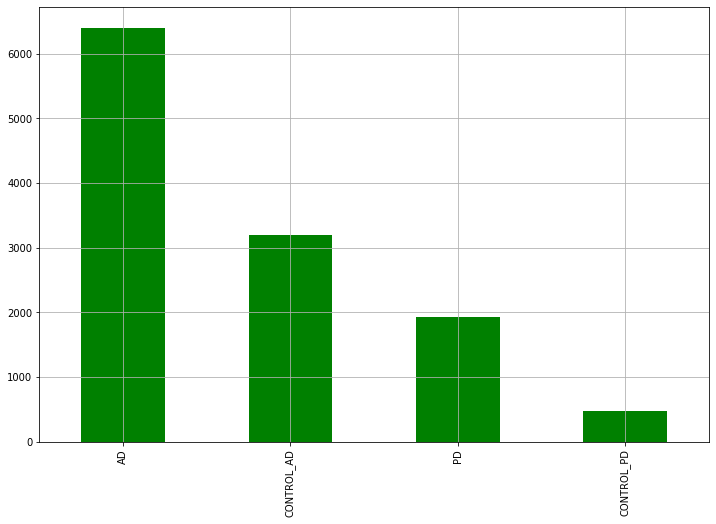

In [6]:
df['Name'].value_counts().plot(kind='bar',figsize = (12,8), grid = True,color = 'green')

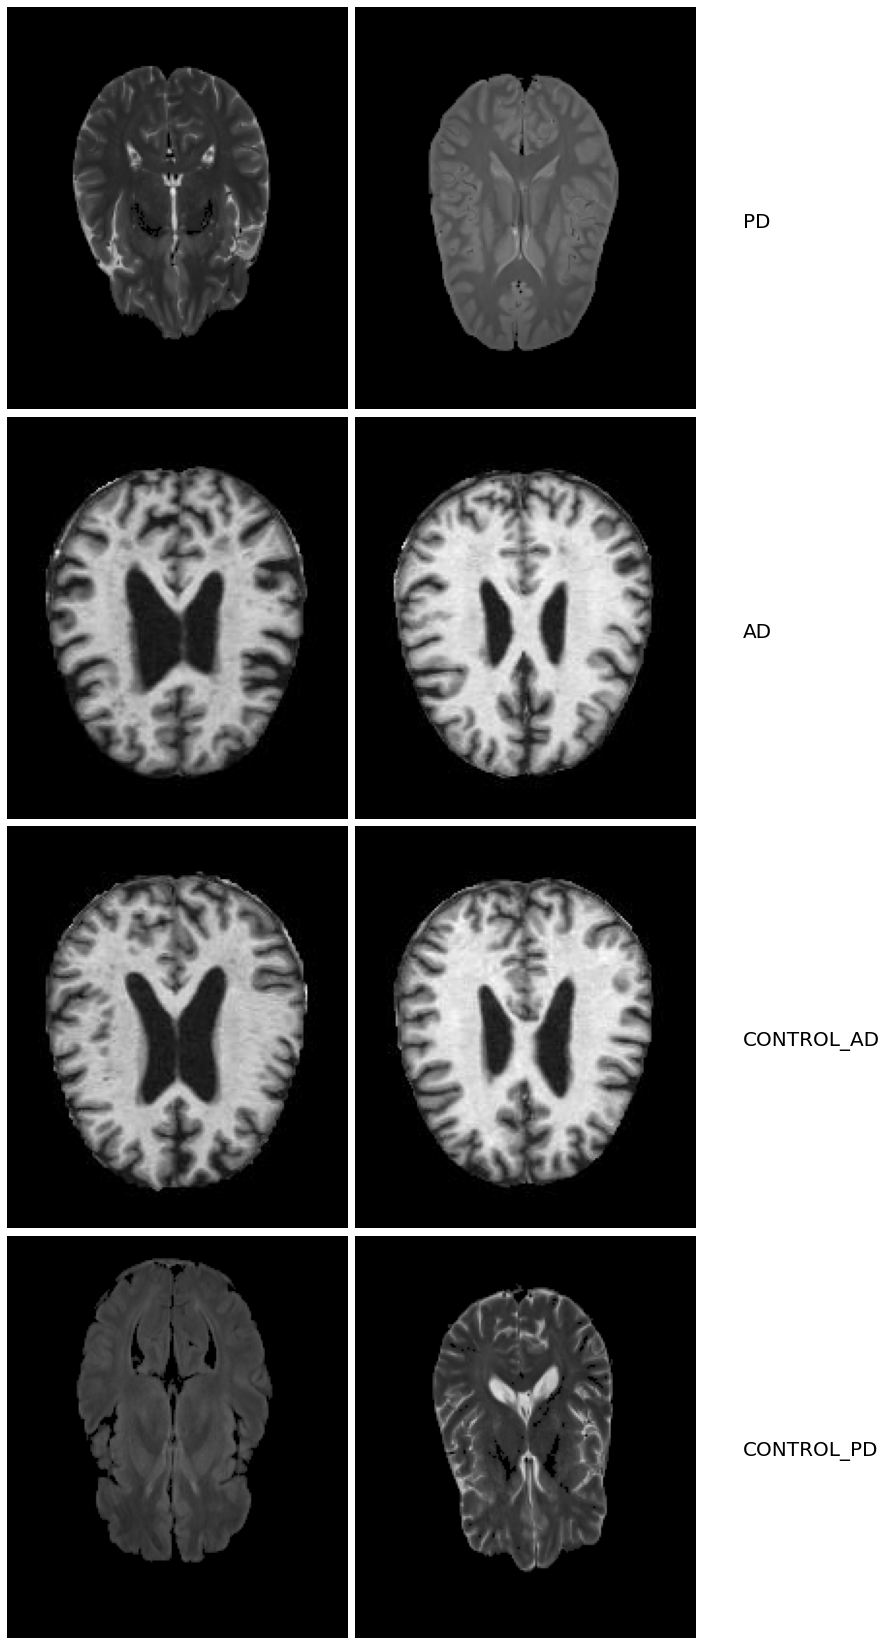

In [7]:
fig = plt.figure(1, figsize=(30, 30))
grid = ImageGrid(fig,121, nrows_ncols=(4, 2), axes_pad=0.10)
i = 0
for category_id, category in enumerate(df.Name.unique()):
    for filepath in df[df['Name'] == category]['Link'].values[:2]:
        ax = grid[i]
        img = image.load_img(filepath, (150, 150))
        img=image.img_to_array(img)
        ax.imshow(img/255)
        ax.axis('off')
        if i % 2 == 2 - 1:
            ax.text(200, 111, category, verticalalignment='center',fontsize=20,color = 'k')
        
            
        i+=1
    
plt.show();

* <h2>Split labels,class and tarin,test:</h2>
+    <h3>train Data </h3>
+   <h3>test data</h3>

In [8]:
x=df.Link
y=df.Labels
x_data,y_data=shuffle(x,y,random_state=42) #data shuffle for better result
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x_data, y_data, test_size=0.1, random_state=42)

<h2>Train and Test image to data format:</h2>

In [9]:
imsize=150
X_train=[]
X_test=[]
for i in xtrain:
    # for train
    img_pre=cv2.imread(str(i))
    img_pre=cv2.resize(img_pre, (imsize,imsize))
    X_train.append(img_pre)
    
    
for j in xtest:
    # for test
    img_pre1=cv2.imread(str(j))
    img_pre1=cv2.resize(img_pre1, (imsize,imsize))
    X_test.append(img_pre1)
    
    
X_train=np.array(X_train)
X_test=np.array(X_test)
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

__<h2>Create model with EfficientNetB7 </h2>__

In [10]:
efficient = EfficientNetB7(weights='imagenet',include_top = False, input_shape=(imsize, imsize, 3))

model = efficient.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(0.5)(model)
model = tf.keras.layers.Dense(4, activation = "softmax")(model)
model = tf.keras.models.Model(inputs = efficient.input , outputs = model)

model.compile(loss = 'categorical_crossentropy', 
             optimizer = "Adam", 
              metrics=["accuracy"]
             )

tensorboard = TensorBoard(log_dir="logs")
checkpoint = ModelCheckpoint("efficientB7.h5", 
                            monitor='val_accuracy', 
                            mode = "auto", 
                            verbose = 1,
                            save_best_only =True)
reduce_LR = ReduceLROnPlateau(monitor="val_accuracy", 
                             factor = 0.3, 
                             patience = 2, 
                             min_delta=0.001, 
                             mode = "auto", 
                            verbose = 1)

2022-09-29 09:16:44.768203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 09:16:44.852912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 09:16:44.853723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 09:16:44.855695: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

258088960/258076736 [==============================] - 1s 0us/step


2022-09-29 09:16:54.005330: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-29 09:16:54.005382: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-09-29 09:16:54.007248: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-09-29 09:16:54.133884: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-29 09:16:54.134058: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


__<h2>Fit model with EfficientNetB7 </h2>__

In [11]:
history = model.fit(X_train, ytrain,
                  validation_data =(X_test,ytest), 
                  epochs = 15, 
                  verbose =1, 
                  batch_size = 32, 
                  callbacks = [tensorboard, checkpoint, reduce_LR])

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
2022-09-29 09:16:56.043025: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-09-29 09:17:24.808963: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/338 [..............................] - ETA: 3:20:07 - loss: 1.5945 - accuracy: 0.1875

2022-09-29 09:17:32.643544: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-29 09:17:32.643596: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/338 [..............................] - ETA: 10:35 - loss: 1.3231 - accuracy: 0.4062  

2022-09-29 09:17:33.619104: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-29 09:17:33.627502: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-09-29 09:17:33.963497: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 7304 callback api events and 7301 activity events. 
2022-09-29 09:17:34.239274: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-29 09:17:34.486289: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_09_29_09_17_34

2022-09-29 09:17:34.615197: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_09_29_09_17_34/dcf3d2885db6.trace.json.gz
2022-09-29 09:17:34.905968: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/pl

338/338 [==============================] - 251s 638ms/step - loss: 0.4394 - accuracy: 0.8161 - val_loss: 0.3035 - val_accuracy: 0.8876

Epoch 00001: val_accuracy improved from -inf to 0.88759, saving model to efficientB7.h5
Epoch 2/15
338/338 [==============================] - 207s 614ms/step - loss: 0.2104 - accuracy: 0.9147 - val_loss: 0.1520 - val_accuracy: 0.9392

Epoch 00002: val_accuracy improved from 0.88759 to 0.93922, saving model to efficientB7.h5
Epoch 3/15
338/338 [==============================] - 207s 614ms/step - loss: 0.1230 - accuracy: 0.9540 - val_loss: 0.1166 - val_accuracy: 0.9600

Epoch 00003: val_accuracy improved from 0.93922 to 0.96003, saving model to efficientB7.h5
Epoch 4/15
338/338 [==============================] - 207s 614ms/step - loss: 0.0872 - accuracy: 0.9685 - val_loss: 0.0841 - val_accuracy: 0.9742

Epoch 00004: val_accuracy improved from 0.96003 to 0.97419, saving model to efficientB7.h5
Epoch 5/15
338/338 [==============================] - 208s 615

__<h2>For data frame loss and accuracy</h2>__

* Make data frame for df_accuracy:
    + loss
    + accuracy
    + val_loss
    + val_accuracy


In [12]:
df_accuracy=pd.DataFrame()
df_accuracy['Loss']=history.history['loss']
df_accuracy['Value Loss']=history.history['val_loss']
df_accuracy['Accuracy']=history.history['accuracy']
df_accuracy['Value Accuracy']=history.history['val_accuracy']

df_accuracy

,Loss,Value Loss,Accuracy,Value Accuracy
0,0.439350,0.303500,0.816104,0.887594
1,0.210399,0.151963,0.914669,0.939217
2,0.122957,0.116636,0.954003,0.960033
3,0.087160,0.084132,0.968533,0.974188
4,0.055683,0.088338,0.980379,0.972523
5,0.044216,0.136755,0.984081,0.959201
6,0.009364,0.042079,0.997223,0.987510
7,0.000921,0.037137,0.999722,0.993339
8,0.000420,0.050626,0.999907,0.991674
9,0.002606,0.065717,0.999167,0.984180


__<h2>Plot for best performance with EfficientNetB7 </h2>__

<AxesSubplot:>

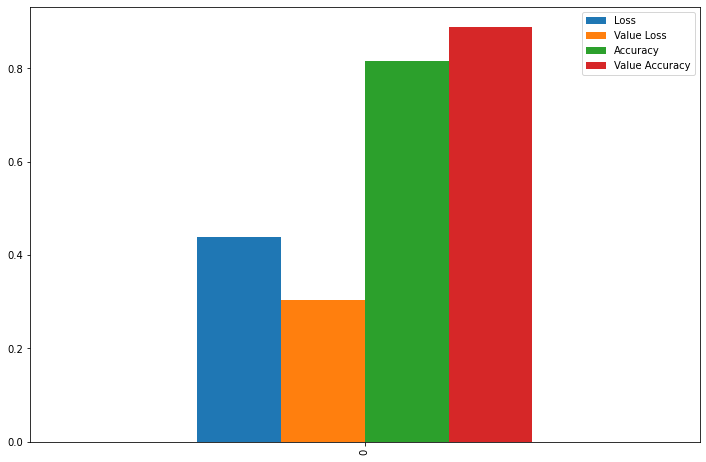

In [13]:
df_accuracy.sort_values('Loss',ascending=False).head(1).plot(kind='bar',figsize = (12,8))

__<h2>Visualization for accuracy</h2>__

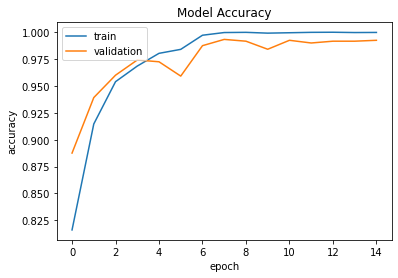

In [14]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(history)

__<h2>Visualization for loss</h2>__

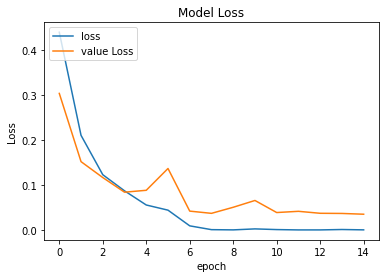

In [15]:
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("epoch")
    plt.legend(["loss", "value Loss"], loc="upper left")
    plt.show()


plot_hist(history)

__<h2>Conclusion:</h2>__
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
Got 99.17 accuracy. it's not easy task. 1st you need to remove contradiction class 'CONTROL' becouse of separet 'CONTROL_PD'/'CONTROL_AD'. Otherwise model loss 20% to 30% accuracy. After that, if you hav e any suggetion to please comments.
</p>
</div>